In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$
f(x) = 3x^2 + 5x + 5
$$

In [2]:
-5 / 6

-0.8333333333333334

In [3]:
def f(x):
    return 3*x**2 + 5*x + 5

def f_grad(x):
    return 6*x + 5

In [4]:
x = np.linspace(-100, 100, 10000)
y = f(x)

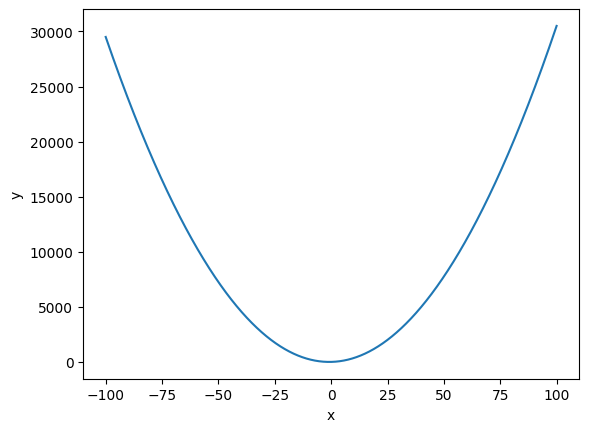

In [5]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel('y')
plt.show()

In [6]:
x0 = np.random.randint(low=-100, high=100)
y0 = f(x0)
(x0, y0)

(-97, 27747)

Initial x: -76
Convergence after 136 steps


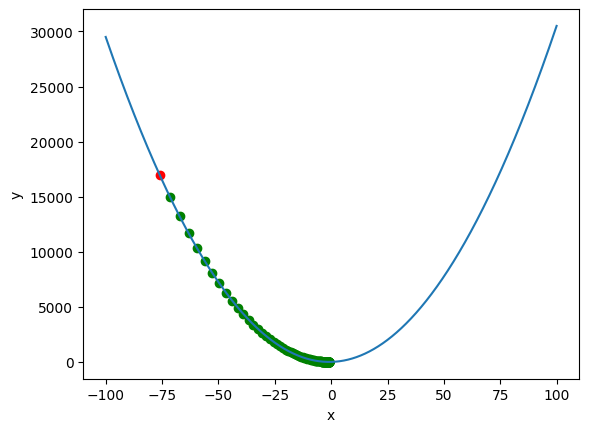

Last x: -0.849983300485753


In [7]:
# hyperparameters
lr = 0.01 # learning rate
tol = 0.001  # tolerance
max_iter = 1000 # maximum number of iterations

plt.plot(x, y)


x0 = np.random.randint(low=-100, high=100) # initialize x0 randomly
y0 = f(x0)
plt.scatter(x0, y0, c='red')

print('Initial x:', x0)


for i in range(max_iter):
    x_grad = f_grad(x0) # calculate gradient
    decay = lr * x_grad

    if abs(decay) < tol:
        print(f'Convergence after {i} steps')
        break

    x0 = x0 - decay # adjust x0 according to gradient

    y0 = f(x0)
    plt.scatter(x0, y0, c='green')


plt.xlabel("x")
plt.ylabel('y')
plt.show()

print('Last x:', x0)

## Using gradient descent to find Linear Regression coefficients

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/advertising.csv')

X = df[['TV']].values
y = df['Sales'].values

sclr = StandardScaler()
X = sclr.fit_transform(X)

$$
\hat{y} = \beta_0 + \beta_1 x
$$

$$
\frac{\partial \text{MSE}(\beta_0, \beta_1)}{\partial \beta_0} = -2*\sum_{i=1}^{N} (y - (\beta_0 + \beta_1 x))
$$

$$
\frac{\partial \text{MSE}(\beta_0, \beta_1)}{\partial \beta_1} = -2*\sum_{i=1}^{N} (y - (\beta_0 + \beta_1 x))x
$$

In [9]:
def loss(beta0, beta1):
    return np.sum((y - (beta0 + beta1 * X).ravel()) ** 2) ** 0.5 / X.shape[0]


def grad_beta(beta0, beta1):
    beta0_grad = -2 * np.sum((y - (beta0 + beta1 * X).ravel()))
    beta1_grad = -2 * np.sum((y - (beta0 + beta1 * X).ravel()) * X.ravel())
    return beta0_grad, beta1_grad

In [10]:
lr = 0.001
tol = 0.0001
max_iter = 1000

Convergence after 22 steps


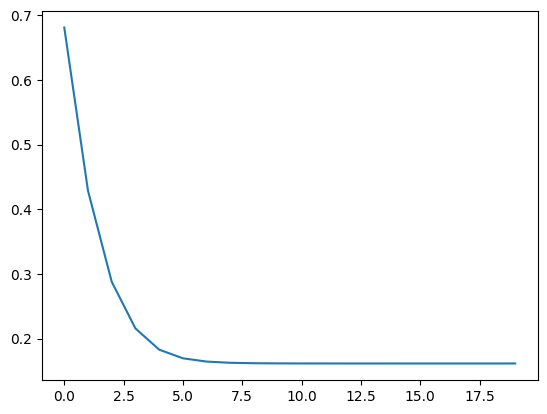

In [11]:
lossi = []

beta0 = np.random.randn()
beta1 = np.random.randn()

for i in range(max_iter):
    beta0_grad, beta1_grad = grad_beta(beta0, beta1)

    if ((lr * beta0_grad)**2 + (lr * beta1_grad)**2)**0.5 < tol:
        print(f'Convergence after {i} steps')
        break

    beta0 = beta0 - lr * beta0_grad # type: ignore
    beta1 = beta1 - lr * beta1_grad # type: ignore
    l = loss(beta0, beta1)
    lossi.append(l)


plt.plot(lossi[:20])
plt.show()

In [12]:
beta0.item(), beta1.item()

(15.130304351067993, 4.7499037444840235)

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [14]:
lin_reg.coef_

array([4.74996588])

In [15]:
lin_reg.intercept_

np.float64(15.130500000000001)

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/advertising.csv')

X = df.drop(columns=['Sales']).values
y = df['Sales'].values

sclr = StandardScaler()
X = sclr.fit_transform(X)

In [17]:
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score

class BatchGradientDescent:
    def __init__(self, lr, max_iter, tol):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        
        self.coef_ = None
        self.intercept_ = None

        self.lossi = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n = X.shape[0]

        X = np.c_[np.ones(n), X]

        n_features = X.shape[1]

        coef = np.random.randn(n_features)

        converged = False

        for epoch in range(self.max_iter):
            y_pred = X @ coef
            e = y - y_pred

            loss = root_mean_squared_error(y, y_pred)
            self.lossi.append(loss)

            coef_grad = (-2 / n) * X.T @ e

            if np.linalg.norm(self.lr * coef_grad) < self.tol:
                converged = True
                break

            coef = coef - self.lr * coef_grad
            
        if not converged:
            raise Exception(f"Did not converge after {self.max_iter} steps.")
        
        self.coef_ = coef[1:]
        self.intercept_ = coef[0]
        self.step = epoch

        return self
    
    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ np.r_[self.intercept_, self.coef_]

    def score(self, X, y):
        return r2_score(y, self.predict(X))



gd = BatchGradientDescent(lr=0.01, max_iter=1000, tol=0.001)
gd.fit(X, y)

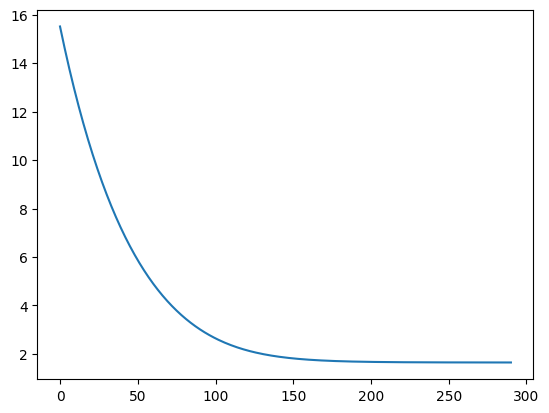

In [18]:
import matplotlib.pyplot as plt

plt.plot(gd.lossi)
plt.show()

In [19]:
gd.score(X, y)

0.9024918429089703

**Batch Gradient Descend:**

$$
\frac{\partial \text{MSE}(\beta)}{\partial \beta} = \frac{1}{2N} (X^TX\beta - X^Ty) = \frac{2}{N} X^T (X\beta - y) = -\frac{2}{N} X^T \varepsilon
$$

$$
\frac{\partial \text{MSE}^{(i)}(\beta)}{\partial \beta} = -2 x^{(i)T}(y^{(i)} - x^{(i)} \beta)
$$

In [20]:
class StochasticGradientDescent:
    def __init__(self, lr, max_iter, tol):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        
        self.coef_ = None
        self.intercept_ = None

        self.lossi = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n = X.shape[0]

        X = np.c_[np.ones(n), X]

        n_features = X.shape[1]

        coef = np.random.randn(n_features)

        converged = False

        for epoch in range(self.max_iter):
            for i in range(n):
                y_pred = X[i] @ coef
                e = y[i] - y_pred

                loss = root_mean_squared_error([y[i]], [y_pred])
                self.lossi.append(loss)

                coef_grad = -2 * X[i].T * e

                if np.linalg.norm(self.lr * coef_grad) < self.tol:
                    converged = True
                    break

                coef = coef - self.lr * coef_grad

            
        if not converged:
            raise Exception(f"Did not converge after {self.max_iter} steps.")
        
        self.coef_ = coef[1:]
        self.intercept_ = coef[0]
        self.step = epoch

        return self
    
    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ np.r_[self.intercept_, self.coef_]

    def score(self, X, y):
        return r2_score(y, self.predict(X))



sgd = StochasticGradientDescent(lr=0.01, max_iter=10, tol=0.001)
sgd.fit(X, y)

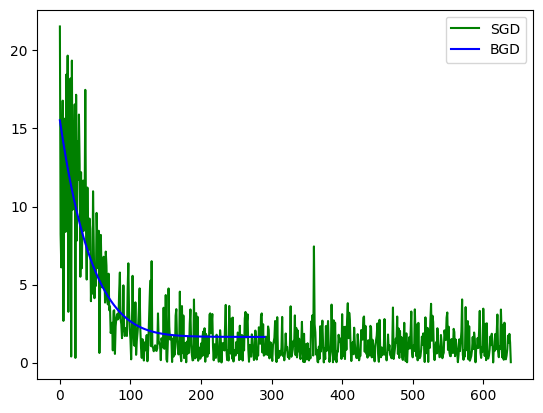

In [21]:
plt.plot(sgd.lossi, c='g', label='SGD')
plt.plot(gd.lossi, c='b', label='BGD')
plt.legend()
plt.show()

In [22]:
BGD = 1000
SGD = 1000000

In [23]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()
sgdr.fit(X,y)

SGDRegressor()

In [24]:
sgd.score(X, y)

0.8976030263889548

In [25]:
sgdr.score(X,y)

0.9025735630694145

In [26]:
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score

class MiniBatchGradientDescent:
    def __init__(self, lr, max_iter, tol):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        
        self.coef_ = None
        self.intercept_ = None

        self.lossi = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n = X.shape[0]

        X = np.c_[np.ones(n), X]

        n_features = X.shape[1]

        coef = np.random.randn(n_features)

        converged = False

        batch_size = int(n**0.5)

        for epoch in range(self.max_iter):
            for i in range((n + batch_size - 1) // batch_size):
                x = X[i * batch_size : min(n, (i + 1) * batch_size)]
                yy = y[i * batch_size : min(n, (i + 1) * batch_size)]
                y_pred = x @ coef
                e = yy - y_pred

                loss = root_mean_squared_error(yy, y_pred)
                self.lossi.append(loss)

                coef_grad = (-2) * x.T @ e

                if np.linalg.norm(self.lr * coef_grad) < self.tol:
                    converged = True
                    break

                coef = coef - self.lr * coef_grad

            
        # if not converged:
        #     raise Exception(f"Did not converge after {self.max_iter} steps.")
        
        self.coef_ = coef[1:]
        self.intercept_ = coef[0]
        self.step = epoch

        return self
    
    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ np.r_[self.intercept_, self.coef_]

    def score(self, X, y):
        return r2_score(y, self.predict(X))
    
mbgd = MiniBatchGradientDescent(lr=0.01, max_iter=10, tol=0.001)
mbgd.fit(X,y)

In [27]:
mbgd.score(X, y)

0.9014685287977225

In [36]:
bgd = BatchGradientDescent(lr=0.1, max_iter=100, tol=0.001)
bgd.fit(X, y)

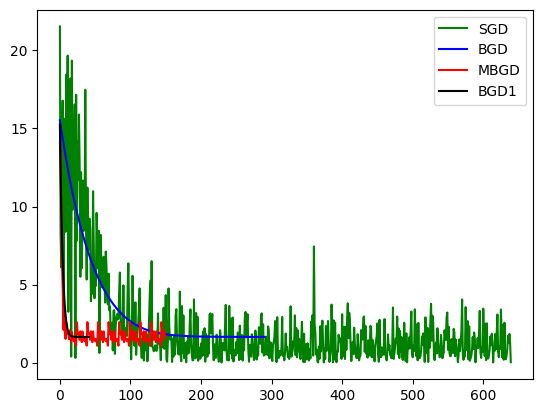

In [37]:
plt.plot(sgd.lossi, c='g', label='SGD')
plt.plot(gd.lossi, c='b', label='BGD')
plt.plot(mbgd.lossi, c='r', label='MBGD')
plt.plot(bgd.lossi, color="black", label="BGD1")
plt.legend()
plt.show()